In [3]:
# 01_EDA_preprocessing.ipynb
# Exploratory Data Analysis & Preprocessing for CrediTrust Complaint Dataset

# -----------------------------
# 1. Imports
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# -----------------------------
# 2. Load CSV (preview mode)
# -----------------------------
# Adjust encoding if needed ('latin1', 'utf-8', etc.)
# nrows=500 loads only first 500 rows for fast preview
df = pd.read_csv("../data/raw/complaints.csv", encoding="latin1", nrows=500)

# Quick look at the first few rows
df.head(10)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
5,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77568,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195711
6,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89107,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195715
7,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,30058,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195718
8,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195719
9,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195720


In [4]:

# -----------------------------
# 3. Inspect columns and data info
# -----------------------------
# Column names
print("Columns in dataset:\n", df.columns.tolist())

# General info
df.info()

# Check for missing values
missing_counts = df.isnull().sum()
print("\nMissing values per column:\n", missing_counts)



Columns in dataset:
 ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 500 non-null    object 
 1   Product                       500 non-null    object 
 2   Sub-product                   500 non-null    object 
 3   Issue                         500 non-null    object 
 4   Sub-issue                     498 non-null    object 
 5   Consumer complaint narrative  2 non-null      object 
 6   Company public response       6 non-null      object 
 7   Company     


Unique products:
 ['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account']

Sample complaints:
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Consumer complaint narrative, dtype: object


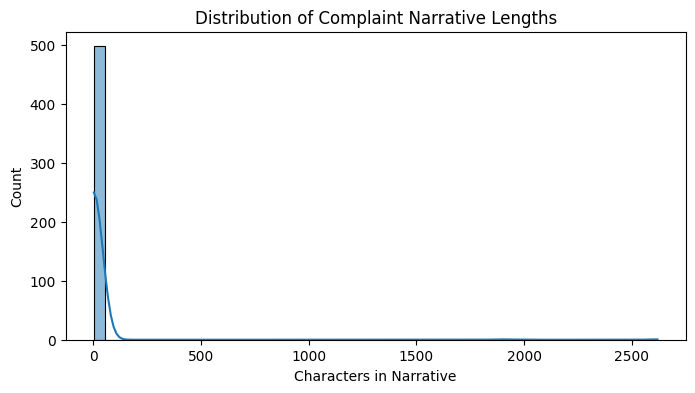

Number of complaints without narratives: 498


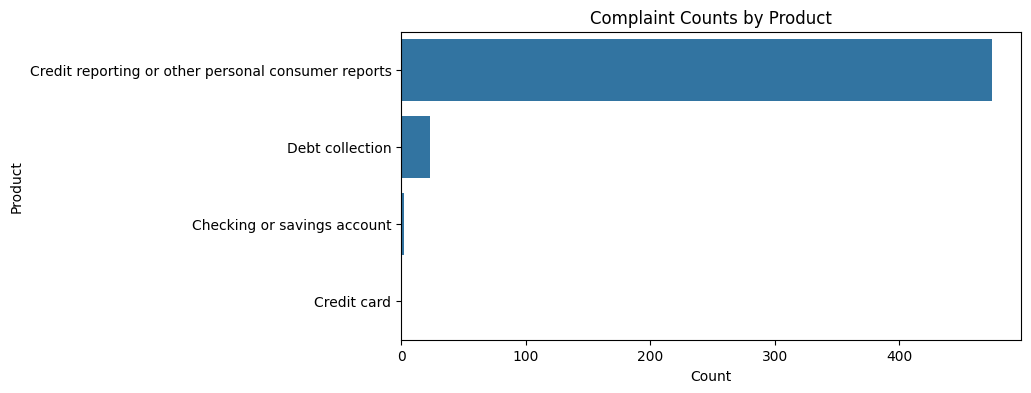

Preview CSV saved to data/processed/complaints_preview.csv


In [5]:
# -----------------------------
# 4. Focus on key columns
# -----------------------------
# Typical important columns in CFPB dataset
# - 'Product'
# - 'Consumer complaint narrative'
# - 'Issue'
# - 'Company'

print("\nUnique products:\n", df['Product'].unique())
print("\nSample complaints:\n", df['Consumer complaint narrative'].head())

# -----------------------------
# 5. Check narrative lengths
# -----------------------------
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Characters in Narrative")
plt.ylabel("Count")
plt.show()

# -----------------------------
# 6. Check for missing narratives
# -----------------------------
missing_narratives = df['Consumer complaint narrative'].isna().sum()
print(f"Number of complaints without narratives: {missing_narratives}")

# -----------------------------
# 7. Quick product distribution
# -----------------------------
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title("Complaint Counts by Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()

# -----------------------------
# 8. Save a preview for testing preprocessing
# -----------------------------
df.to_csv("../data/processed/complaints_preview.csv", index=False)
print("Preview CSV saved to data/processed/complaints_preview.csv")